In [108]:
import pandas as pd

In [109]:
path = r'E:/kaggle/latest_projects/stock_market/dn.csv'

In [110]:
df = pd.read_csv(path)

In [111]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-29,18.490000,18.490000,17.620001,17.730000,15.058702,23140.0
1,2010-09-30,17.415001,18.299999,17.415001,17.959999,15.254049,10580.0
2,2010-10-01,17.615000,18.000000,17.615000,17.805000,15.122401,2360.0
3,2010-10-04,19.000000,19.900000,17.889999,17.985001,15.275281,4800.0
4,2010-10-05,19.000000,19.000000,17.150000,18.045000,15.326241,10350.0


In [112]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2753,2021-11-23,2129.000000,2168.500000,2052.000000,2152.649902,2152.649902,1234236.0
2754,2021-11-24,2173.000000,2187.000000,2140.000000,2155.149902,2155.149902,559363.0
2755,2021-11-25,2164.800049,2176.949951,2115.100098,2159.500000,2159.500000,699420.0
2756,2021-11-26,2120.000000,2182.050049,2082.149902,2105.600098,2105.600098,872720.0
2757,2021-11-29,2063.000000,2105.000000,2005.000000,2086.449951,2086.449951,995794.0


In [113]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [114]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2.749000e+03
mean,292.659229,298.814234,286.774867,292.426517,289.485732,3.114328e+05
std,512.945810,522.908132,503.185409,512.345769,513.100749,6.185661e+05
min,13.900000,14.400000,13.630000,13.800000,12.039678,0.000000e+00
25%,26.715000,27.000000,26.500000,26.650000,24.394863,1.177700e+04
50%,86.800003,88.699997,84.800003,86.349998,81.855927,7.081300e+04
75%,270.100006,274.649994,265.000000,269.450012,264.782349,3.149590e+05
max,2921.000000,3020.000000,2877.000000,2925.899902,2925.899902,7.372732e+06


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2758 non-null   object 
 1   Open       2749 non-null   float64
 2   High       2749 non-null   float64
 3   Low        2749 non-null   float64
 4   Close      2749 non-null   float64
 5   Adj Close  2749 non-null   float64
 6   Volume     2749 non-null   float64
dtypes: float64(6), object(1)
memory usage: 151.0+ KB


In [116]:
for c in df.columns:

    print(c)
    print(len(df[c].unique()))
    print(" ")

Date
2758
 
Open
1903
 
High
1917
 
Low
1888
 
Close
2100
 
Adj Close
2240
 
Volume
2456
 


### The available data is from OCT 2010 to NOV 2021. 

There are total 7 columns.

The low of stock during this period is 13.63 and high is 3020. 3020/13.63 = 221 times the money in 11 years :)

The mean is very high compared to median so assumption is that data must be rightly skewed.

There are few null values which should be removed.

Volume is having big values, so a model which does not require scaling should be used such as random forest or xgboost.

# As per my knowledge there are many technical/logical tools  which can be used to add useful information to the dataframe

The tools which will be used are: 

Relative strength index(RSI) - Represents bull/bear strength

Moving average convergence divergence (MACD) - Represents bullish/bearish momentum

Moving average - Shows short and long term support, also indicates trend

%change in close price - Shows us the recent momentum

Year - Useful for stock direction in long run

Month of year - Useful for stock direction in short run

Money flow index(MFI) - Represents bull/bear momentum

Ichimoku cloud - Full fledged tool for trading - gives long term and short term trend with strength of trend

Exponential moving average - Shows short and long term support, also indicates trend but recent data is given more importance

Change in volume for past 3 days - Volume activity represent entry and exit of big fish

Open/Close 1 day ago - useful for identifying strenght between bull and bear

High/Low 1 day ago - Useful for identifying volatility

In [117]:
df.isnull().sum()

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

In [118]:
df.dropna(inplace=True)

In [119]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [120]:
df.shape

(2749, 7)

In [121]:
df['Date'] =  pd.to_datetime(df['Date'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 0 to 2757
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2749 non-null   datetime64[ns]
 1   Open       2749 non-null   float64       
 2   High       2749 non-null   float64       
 3   Low        2749 non-null   float64       
 4   Close      2749 non-null   float64       
 5   Adj Close  2749 non-null   float64       
 6   Volume     2749 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 171.8 KB


In [123]:
df["Month"] = df["Date"].dt.month

In [124]:
df["Year"] = df["Date"].dt.year

In [125]:
df["Day"] =   df["Date"].dt.day

In [126]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Day
0,2010-09-29,18.490000,18.490000,17.620001,17.730000,15.058702,23140.0,9,2010,29
1,2010-09-30,17.415001,18.299999,17.415001,17.959999,15.254049,10580.0,9,2010,30
2,2010-10-01,17.615000,18.000000,17.615000,17.805000,15.122401,2360.0,10,2010,1
3,2010-10-04,19.000000,19.900000,17.889999,17.985001,15.275281,4800.0,10,2010,4
4,2010-10-05,19.000000,19.000000,17.150000,18.045000,15.326241,10350.0,10,2010,5


In [127]:
df.drop(["Date","Adj Close"],axis=1,inplace=True)

In [128]:
df.head()

,Open,High,Low,Close,Volume,Month,Year,Day
0,18.490000,18.490000,17.620001,17.730000,23140.0,9,2010,29
1,17.415001,18.299999,17.415001,17.959999,10580.0,9,2010,30
2,17.615000,18.000000,17.615000,17.805000,2360.0,10,2010,1
3,19.000000,19.900000,17.889999,17.985001,4800.0,10,2010,4
4,19.000000,19.000000,17.150000,18.045000,10350.0,10,2010,5


In [129]:
df.describe()

,Open,High,Low,Close,Volume,Month,Year,Day
count,2749.000000,2749.000000,2749.000000,2749.000000,2.749000e+03,2749.000000,2749.000000,2749.000000
mean,292.659229,298.814234,286.774867,292.426517,3.114328e+05,6.553292,2015.819207,15.777010
std,512.945810,522.908132,503.185409,512.345769,6.185661e+05,3.455553,3.235040,8.784089
min,13.900000,14.400000,13.630000,13.800000,0.000000e+00,1.000000,2010.000000,1.000000
25%,26.715000,27.000000,26.500000,26.650000,1.177700e+04,4.000000,2013.000000,8.000000
50%,86.800003,88.699997,84.800003,86.349998,7.081300e+04,7.000000,2016.000000,16.000000
75%,270.100006,274.649994,265.000000,269.450012,3.149590e+05,10.000000,2019.000000,23.000000
max,2921.000000,3020.000000,2877.000000,2925.899902,7.372732e+06,12.000000,2021.000000,31.000000


### Moving average

In [130]:
df["Ma_2"]= df["Close"].rolling(2).mean()
df["Ma_5"]= df["Close"].rolling(5).mean()
df["Ma_12"]= df["Close"].rolling(12).mean()
df["Ma_25"]= df["Close"].rolling(25).mean()
df["Ma_50"]= df["Close"].rolling(50).mean()
df["Ma_100"]= df["Close"].rolling(100).mean()
df["Ma_200"]= df["Close"].rolling(200).mean()

In [131]:
df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,Ma_12,Ma_25,Ma_50,Ma_100,Ma_200
0,18.490000,18.490000,17.620001,17.730000,23140.0,9,2010,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.415001,18.299999,17.415001,17.959999,10580.0,9,2010,30,17.845000,NaN,NaN,NaN,NaN,NaN,NaN
2,17.615000,18.000000,17.615000,17.805000,2360.0,10,2010,1,17.882500,NaN,NaN,NaN,NaN,NaN,NaN
3,19.000000,19.900000,17.889999,17.985001,4800.0,10,2010,4,17.895001,NaN,NaN,NaN,NaN,NaN,NaN
4,19.000000,19.000000,17.150000,18.045000,10350.0,10,2010,5,18.015000,17.905,NaN,NaN,NaN,NaN,NaN


### Moving average exponential

In [132]:
df["Ema_2"] = df["Close"].ewm(span=2,adjust=False).mean()
df["Ema_5"] = df["Close"].ewm(span=5,adjust=False).mean()
df["Ema_12"] = df["Close"].ewm(span=12,adjust=False).mean()
df["Ema_25"] = df["Close"].ewm(span=25,adjust=False).mean()
df["Ema_50"] = df["Close"].ewm(span=50,adjust=False).mean()
df["Ema_100"] = df["Close"].ewm(span=100,adjust=False).mean()
df["Ema_200"] = df["Close"].ewm(span=200,adjust=False).mean()

In [133]:
df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,Ma_50,Ma_100,Ma_200,Ema_2,Ema_5,Ema_12,Ema_25,Ema_50,Ema_100,Ema_200
0,18.490000,18.490000,17.620001,17.730000,23140.0,9,2010,29,NaN,NaN,...,NaN,NaN,NaN,17.730000,17.730000,17.730000,17.730000,17.730000,17.730000,17.730000
1,17.415001,18.299999,17.415001,17.959999,10580.0,9,2010,30,17.845000,NaN,...,NaN,NaN,NaN,17.883333,17.806666,17.765384,17.747692,17.739020,17.734554,17.732289
2,17.615000,18.000000,17.615000,17.805000,2360.0,10,2010,1,17.882500,NaN,...,NaN,NaN,NaN,17.831111,17.806111,17.771479,17.752101,17.741607,17.735949,17.733012
3,19.000000,19.900000,17.889999,17.985001,4800.0,10,2010,4,17.895001,NaN,...,NaN,NaN,NaN,17.933704,17.865741,17.804329,17.770016,17.751152,17.740881,17.735519
4,19.000000,19.000000,17.150000,18.045000,10350.0,10,2010,5,18.015000,17.905,...,NaN,NaN,NaN,18.007901,17.925494,17.841355,17.791169,17.762675,17.746903,17.738599


In [134]:
df["Open"].loc[32]

19.200001

In [135]:
import matplotlib.pyplot as plt

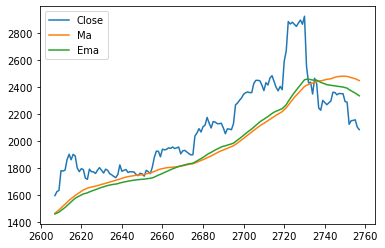

In [136]:
plt.plot(df["Close"].tail(150),label="Close")
plt.plot(df["Ma_50"].tail(150),label="Ma")
plt.plot(df["Ema_50"].tail(150),label="Ema")
plt.legend(loc=2)

### MFI (Money flow index)

In [137]:
test_df = pd.DataFrame()

In [138]:
test_df["typ_price"]= (df["Low"]+df["High"]+df["Close"])/3
test_df["money_flow"] = test_df["typ_price"]*df["Volume"]
test_df["positive_flow"] = 0
test_df["negative_flow"] = 0
j=0



In [139]:
test_df["typ_price_shifted"] = test_df["typ_price"].shift(-1)

In [140]:
test_df.head()

,typ_price,money_flow,positive_flow,negative_flow,typ_price_shifted
0,17.946667,415285.874380,0,0,17.891666
1,17.891666,189293.829807,0,0,17.806667
2,17.806667,42023.733333,0,0,18.591667
3,18.591667,89240.000000,0,0,18.065000
4,18.065000,186972.750000,0,0,18.258333


In [141]:
import numpy as np

In [142]:
test_df["positive_flow"] = np.where((test_df["typ_price"]>test_df["typ_price_shifted"]),test_df["money_flow"],0)
test_df["negative_flow"] = np.where((test_df["typ_price"]<test_df["typ_price_shifted"]),test_df["money_flow"],0)

In [143]:
test_df.head(5)

,typ_price,money_flow,positive_flow,negative_flow,typ_price_shifted
0,17.946667,415285.874380,415285.874380,0.000000,17.891666
1,17.891666,189293.829807,189293.829807,0.000000,17.806667
2,17.806667,42023.733333,0.000000,42023.733333,18.591667
3,18.591667,89240.000000,89240.000000,0.000000,18.065000
4,18.065000,186972.750000,0.000000,186972.750000,18.258333


In [144]:
test_df["positive_flow_avg_14"] = test_df["positive_flow"].rolling(14).mean()
test_df["negative_flow_avg_14"] = test_df["negative_flow"].rolling(14).mean()

In [145]:
test_df.head(20)

,typ_price,money_flow,positive_flow,negative_flow,typ_price_shifted,positive_flow_avg_14,negative_flow_avg_14
0,17.946667,415285.874380,415285.874380,0.000000,17.891666,NaN,NaN
1,17.891666,189293.829807,189293.829807,0.000000,17.806667,NaN,NaN
2,17.806667,42023.733333,0.000000,42023.733333,18.591667,NaN,NaN
3,18.591667,89240.000000,89240.000000,0.000000,18.065000,NaN,NaN
4,18.065000,186972.750000,0.000000,186972.750000,18.258333,NaN,NaN
5,18.258333,227864.000000,227864.000000,0.000000,18.126667,NaN,NaN
6,18.126667,42960.200790,42960.200790,0.000000,18.101666,NaN,NaN
7,18.101666,23532.166233,0.000000,23532.166233,18.353334,NaN,NaN
8,18.353334,77451.068073,77451.068073,0.000000,18.200001,NaN,NaN
9,18.200001,4550.000250,0.000000,4550.000250,18.366666,NaN,NaN


In [146]:
test_df["money_ratio"] = test_df["positive_flow_avg_14"]/test_df["negative_flow_avg_14"]

In [147]:
test_df["money_ratio"].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13    1.425998
14    1.316488
15    1.135798
16    1.063407
17    0.964103
18    1.247183
19    0.997906
Name: money_ratio, dtype: float64

In [148]:
test_df["Mfi"] = 100-(100/(1+test_df["money_ratio"]))

In [149]:
test_df["Mfi"].describe()

count    2736.000000
mean       48.975868
std        20.966995
min         0.050934
25%        34.070850
50%        48.866234
75%        64.117764
max        98.720394
Name: Mfi, dtype: float64

In [150]:
df["MFI"]= test_df["Mfi"] 

In [151]:
df.head(25)

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,Ma_100,Ma_200,Ema_2,Ema_5,Ema_12,Ema_25,Ema_50,Ema_100,Ema_200,MFI
0,18.490000,18.490000,17.620001,17.730000,23140.0,9,2010,29,NaN,NaN,...,NaN,NaN,17.730000,17.730000,17.730000,17.730000,17.730000,17.730000,17.730000,NaN
1,17.415001,18.299999,17.415001,17.959999,10580.0,9,2010,30,17.845000,NaN,...,NaN,NaN,17.883333,17.806666,17.765384,17.747692,17.739020,17.734554,17.732289,NaN
2,17.615000,18.000000,17.615000,17.805000,2360.0,10,2010,1,17.882500,NaN,...,NaN,NaN,17.831111,17.806111,17.771479,17.752101,17.741607,17.735949,17.733012,NaN
3,19.000000,19.900000,17.889999,17.985001,4800.0,10,2010,4,17.895001,NaN,...,NaN,NaN,17.933704,17.865741,17.804329,17.770016,17.751152,17.740881,17.735519,NaN
4,19.000000,19.000000,17.150000,18.045000,10350.0,10,2010,5,18.015000,17.905000,...,NaN,NaN,18.007901,17.925494,17.841355,17.791169,17.762675,17.746903,17.738599,NaN
5,18.600000,18.600000,17.855000,18.320000,12480.0,10,2010,6,18.182500,18.023000,...,NaN,NaN,18.215967,18.056996,17.914993,17.831848,17.784531,17.758252,17.744384,NaN
6,18.320000,18.475000,17.950001,17.955000,2370.0,10,2010,7,18.137500,18.022000,...,NaN,NaN,18.041989,18.022997,17.921148,17.841321,17.791216,17.762148,17.746480,NaN
7,17.504999,18.400000,17.504999,18.400000,1300.0,10,2010,8,18.177500,18.141000,...,NaN,NaN,18.280663,18.148665,17.994817,17.884296,17.815090,17.774778,17.752982,NaN
8,18.400000,18.475000,18.110001,18.475000,4220.0,10,2010,11,18.437500,18.239000,...,NaN,NaN,18.410221,18.257443,18.068692,17.929735,17.840969,17.788644,17.760167,NaN
9,18.200001,18.200001,18.200001,18.200001,250.0,10,2010,12,18.337501,18.270000,...,NaN,NaN,18.270074,18.238296,18.088893,17.950525,17.855049,17.796790,17.764543,NaN


In [152]:
df["MFI_above_80"] = np.where((df["MFI"]>80),1,0)
df["MFI_below_20"] = np.where((df["MFI"]<20),1,0)
df["MFI_above_50"] = np.where((df["MFI"]>50),1,0)
df["MFI_below_50"] = np.where((df["MFI"]<50),1,0)

In [153]:
df.head(20)

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,Ema_12,Ema_25,Ema_50,Ema_100,Ema_200,MFI,MFI_above_80,MFI_below_20,MFI_above_50,MFI_below_50
0,18.490000,18.490000,17.620001,17.730000,23140.0,9,2010,29,NaN,NaN,...,17.730000,17.730000,17.730000,17.730000,17.730000,NaN,0,0,0,0
1,17.415001,18.299999,17.415001,17.959999,10580.0,9,2010,30,17.845000,NaN,...,17.765384,17.747692,17.739020,17.734554,17.732289,NaN,0,0,0,0
2,17.615000,18.000000,17.615000,17.805000,2360.0,10,2010,1,17.882500,NaN,...,17.771479,17.752101,17.741607,17.735949,17.733012,NaN,0,0,0,0
3,19.000000,19.900000,17.889999,17.985001,4800.0,10,2010,4,17.895001,NaN,...,17.804329,17.770016,17.751152,17.740881,17.735519,NaN,0,0,0,0
4,19.000000,19.000000,17.150000,18.045000,10350.0,10,2010,5,18.015000,17.905000,...,17.841355,17.791169,17.762675,17.746903,17.738599,NaN,0,0,0,0
5,18.600000,18.600000,17.855000,18.320000,12480.0,10,2010,6,18.182500,18.023000,...,17.914993,17.831848,17.784531,17.758252,17.744384,NaN,0,0,0,0
6,18.320000,18.475000,17.950001,17.955000,2370.0,10,2010,7,18.137500,18.022000,...,17.921148,17.841321,17.791216,17.762148,17.746480,NaN,0,0,0,0
7,17.504999,18.400000,17.504999,18.400000,1300.0,10,2010,8,18.177500,18.141000,...,17.994817,17.884296,17.815090,17.774778,17.752982,NaN,0,0,0,0
8,18.400000,18.475000,18.110001,18.475000,4220.0,10,2010,11,18.437500,18.239000,...,18.068692,17.929735,17.840969,17.788644,17.760167,NaN,0,0,0,0
9,18.200001,18.200001,18.200001,18.200001,250.0,10,2010,12,18.337501,18.270000,...,18.088893,17.950525,17.855049,17.796790,17.764543,NaN,0,0,0,0


### RSI

In [154]:
test_df = pd.DataFrame()

In [155]:
test_df["Close"]=df["Close"]

In [156]:
test_df["Close_shifted"] = df["Close"].shift(-1)

In [157]:
test_df.head()

,Close,Close_shifted
0,17.730000,17.959999
1,17.959999,17.805000
2,17.805000,17.985001
3,17.985001,18.045000
4,18.045000,18.320000


In [158]:
test_df["up_move"] = np.where(test_df["Close_shifted"]>test_df["Close"],(test_df["Close_shifted"]-test_df["Close"]),0)
test_df["down_move"] = np.where(test_df["Close_shifted"]<test_df["Close"],(test_df["Close"]-test_df["Close_shifted"]),0)

In [159]:
test_df.head(10)

,Close,Close_shifted,up_move,down_move
0,17.730000,17.959999,0.229999,0.000000
1,17.959999,17.805000,0.000000,0.154999
2,17.805000,17.985001,0.180001,0.000000
3,17.985001,18.045000,0.059999,0.000000
4,18.045000,18.320000,0.275000,0.000000
5,18.320000,17.955000,0.000000,0.365000
6,17.955000,18.400000,0.445000,0.000000
7,18.400000,18.475000,0.075000,0.000000
8,18.475000,18.200001,0.000000,0.274999
9,18.200001,18.400000,0.199999,0.000000


In [160]:
test_df["upmove_14"] = test_df["up_move"].rolling(14).mean()
test_df["downmove_14"] = test_df["down_move"].rolling(14).mean()

In [161]:
test_df["RS"] = test_df["upmove_14"]/test_df["downmove_14"] 
test_df["RSI"] = 100-(100/(1+test_df["RS"]))

In [162]:
test_df["RSI"].describe()

count    2736.000000
mean       54.380497
std        17.560550
min         3.067425
25%        42.738277
50%        54.026914
75%        66.578520
max        99.849428
Name: RSI, dtype: float64

In [163]:
df["RSI"] = test_df["RSI"]

In [164]:
df["RSI_above_60"] = np.where(df["RSI"]>60,1,0)
df["RSI_below_40"] = np.where(df["RSI"]<60,1,0)

### MACD (Moving average convergence/divergence)

In [165]:
test_df = pd.DataFrame()

In [166]:
test_df["Ema_12"] = df["Close"].ewm(span=12,adjust=False).mean()
test_df["Ema_26"] = df["Close"].ewm(span=26,adjust=False).mean()

In [167]:
test_df["MACD"]= test_df["Ema_12"]-test_df["Ema_26"]

In [168]:
test_df.tail()

,Ema_12,Ema_26,MACD
2753,2286.359306,2363.804023,-77.444717
2754,2266.173244,2348.348162,-82.174919
2755,2249.761976,2334.359410,-84.597434
2756,2227.583225,2317.414276,-89.831050
2757,2205.870414,2300.305807,-94.435393


In [169]:
test_df["MACD_signal"] = test_df["MACD"].ewm(span=9,adjust=False).mean()

In [170]:
test_df.tail()

,Ema_12,Ema_26,MACD,MACD_signal
2753,2286.359306,2363.804023,-77.444717,-60.692981
2754,2266.173244,2348.348162,-82.174919,-64.989368
2755,2249.761976,2334.359410,-84.597434,-68.910981
2756,2227.583225,2317.414276,-89.831050,-73.094995
2757,2205.870414,2300.305807,-94.435393,-77.363075


In [171]:
test_df["MACD_above_MACDsignal"] = np.where(test_df["MACD"]>test_df["MACD_signal"],1,0)

In [172]:
test_df.tail(10)

,Ema_12,Ema_26,MACD,MACD_signal,MACD_above_MACDsignal
2748,2367.324547,2424.576621,-57.252074,-50.558706,0
2749,2364.997686,2419.215386,-54.217700,-51.290505,0
2750,2354.144188,2409.973502,-55.829314,-52.198266,0
2751,2344.237390,2401.068057,-56.830667,-53.124747,0
2752,2310.670107,2380.696353,-70.026246,-56.505047,0
2753,2286.359306,2363.804023,-77.444717,-60.692981,0
2754,2266.173244,2348.348162,-82.174919,-64.989368,0
2755,2249.761976,2334.359410,-84.597434,-68.910981,0
2756,2227.583225,2317.414276,-89.831050,-73.094995,0
2757,2205.870414,2300.305807,-94.435393,-77.363075,0


In [173]:
df["MACD"] = test_df["MACD"]
df["MACD_signal"] = test_df["MACD_signal"]
df["MACD_above_MACDsignal"] = test_df["MACD_above_MACDsignal"]

In [174]:
df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,MFI_above_80,MFI_below_20,MFI_above_50,MFI_below_50,RSI,RSI_above_60,RSI_below_40,MACD,MACD_signal,MACD_above_MACDsignal
0,18.490000,18.490000,17.620001,17.730000,23140.0,9,2010,29,NaN,NaN,...,0,0,0,0,NaN,0,0,0.000000,0.000000,0
1,17.415001,18.299999,17.415001,17.959999,10580.0,9,2010,30,17.845000,NaN,...,0,0,0,0,NaN,0,0,0.018347,0.003669,1
2,17.615000,18.000000,17.615000,17.805000,2360.0,10,2010,1,17.882500,NaN,...,0,0,0,0,NaN,0,0,0.020149,0.006965,1
3,19.000000,19.900000,17.889999,17.985001,4800.0,10,2010,4,17.895001,NaN,...,0,0,0,0,NaN,0,0,0.035689,0.012710,1
4,19.000000,19.000000,17.150000,18.045000,10350.0,10,2010,5,18.015000,17.905,...,0,0,0,0,NaN,0,0,0.052244,0.020617,1


### change in close

In [175]:
df["Close_change_1_day"] = (df["Close"].shift(-1))/df["Close"]
df["Close_change_2_day"] = (df["Close"].shift(-2))/df["Close"]
df["Close_change_3_day"] = (df["Close"].shift(-3))/df["Close"]
df["Close_change_5_day"] = (df["Close"].shift(-5))/df["Close"]
df["Close_change_10_day"] = (df["Close"].shift(-10))/df["Close"]

### change in volume

In [176]:
df["volume_change_1_day"] =(df["Volume"].shift(-1))/df["Volume"]
df["volume_change_2_day"] =(df["Volume"].shift(-2))/df["Volume"]
df["volume_change_3_day"] =(df["Volume"].shift(-3))/df["Volume"]

### volatiliy and bull/bear indicator

In [177]:
df["open/close"] = df["Open"]/df["Close"]

In [178]:
df["High/low"] = df["High"]/df["Low"]

### ichimoku cloud

In [179]:
test_df = pd.DataFrame()

In [180]:
test_df["9_ph"] = df["High"].rolling(9).max()
test_df["9_pl"] = df["Low"].rolling(9).min()
test_df["26_ph"] = df["High"].rolling(26).max()
test_df["26_pl"] = df["Low"].rolling(26).min()
test_df["52_ph"] = df["High"].rolling(52).max()
test_df["52_pl"] = df["Low"].rolling(52).min()

In [181]:
test_df.head(10)

,9_ph,9_pl,26_ph,26_pl,52_ph,52_pl
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,19.9,17.15,NaN,NaN,NaN,NaN
9,19.9,17.15,NaN,NaN,NaN,NaN


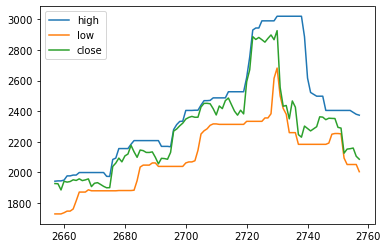

In [182]:
plt.plot(test_df["9_ph"].tail(100),label="high")
plt.plot(test_df["9_pl"].tail(100),label="low")
plt.plot(df["Close"].tail(100),label="close")
plt.legend(loc=2)

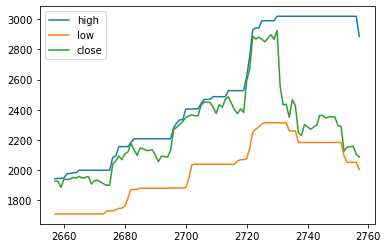

In [183]:
plt.plot(test_df["26_ph"].tail(100),label="high")
plt.plot(test_df["26_pl"].tail(100),label="low")
plt.plot(df["Close"].tail(100),label="close")
plt.legend(loc=2)

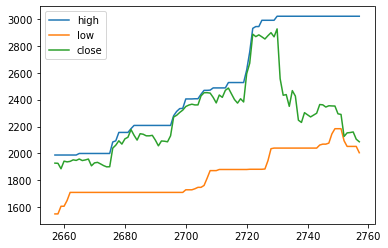

In [184]:
plt.plot(test_df["52_ph"].tail(100),label="high")
plt.plot(test_df["52_pl"].tail(100),label="low")
plt.plot(df["Close"].tail(100),label="close")
plt.legend(loc=2)

In [185]:
test_df["tenkan_sen"] = (test_df["9_ph"]+test_df["9_pl"])/2
test_df["kijun_sen"] = (test_df["26_ph"]+test_df["26_pl"])/2
test_df["senkou_A"] = (test_df["tenkan_sen"] +test_df["kijun_sen"])/2
test_df["senkou_B"] = (test_df["52_ph"]+test_df["52_pl"])/2
test_df["chikou"] = df["Close"].shift(26)

In [186]:
df["tenkan_sen"] =test_df["tenkan_sen"] 
df["kijun_sen"]=test_df["kijun_sen"]
df["senkou_A"]=test_df["senkou_A"]
df["senkou_B"]=test_df["senkou_B"]
df["chikou"]=test_df["chikou"]

In [187]:
df["tenkan_above_kijun"] = np.where(df["tenkan_sen"]>df["kijun_sen"],1,0)
df["kijun_above_senkou_A"] =np.where(df["kijun_sen"]>df["senkou_A"],1,0)
df["tenken_above_senkou_A"] =np.where(df["tenkan_sen"]>df["senkou_A"],1,0)
df["kijun_above_senkou_B"] =np.where(df["kijun_sen"]>df["senkou_B"],1,0)
df["tenken_above_senkou_B"] =np.where(df["tenkan_sen"]>df["senkou_B"],1,0)
df["senkou_A_above_B"] = np.where(df["senkou_A"]>df["senkou_B"],1,0)
df["close_above_chikou"] = np.where(df["Close"]>df["chikou"],1,0)

In [188]:
df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,senkou_A,senkou_B,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou
0,18.490000,18.490000,17.620001,17.730000,23140.0,9,2010,29,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,17.415001,18.299999,17.415001,17.959999,10580.0,9,2010,30,17.845000,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
2,17.615000,18.000000,17.615000,17.805000,2360.0,10,2010,1,17.882500,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,19.000000,19.900000,17.889999,17.985001,4800.0,10,2010,4,17.895001,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
4,19.000000,19.000000,17.150000,18.045000,10350.0,10,2010,5,18.015000,17.905,...,NaN,NaN,NaN,0,0,0,0,0,0,0


In [189]:
df.shape

(2749, 55)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 0 to 2757
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2749 non-null   float64
 1   High                   2749 non-null   float64
 2   Low                    2749 non-null   float64
 3   Close                  2749 non-null   float64
 4   Volume                 2749 non-null   float64
 5   Month                  2749 non-null   int64  
 6   Year                   2749 non-null   int64  
 7   Day                    2749 non-null   int64  
 8   Ma_2                   2748 non-null   float64
 9   Ma_5                   2745 non-null   float64
 10  Ma_12                  2738 non-null   float64
 11  Ma_25                  2725 non-null   float64
 12  Ma_50                  2700 non-null   float64
 13  Ma_100                 2650 non-null   float64
 14  Ma_200                 2550 non-null   float64
 15  Ema_

In [191]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2749.0,2.926592e+02,512.945810,13.900000,26.715000,86.800003,270.100006,2.921000e+03
High,2749.0,2.988142e+02,522.908132,14.400000,27.000000,88.699997,274.649994,3.020000e+03
Low,2749.0,2.867749e+02,503.185409,13.630000,26.500000,84.800003,265.000000,2.877000e+03
Close,2749.0,2.924265e+02,512.345769,13.800000,26.650000,86.349998,269.450012,2.925900e+03
Volume,2749.0,3.114328e+05,618566.110432,0.000000,11777.000000,70813.000000,314959.000000,7.372732e+06
Month,2749.0,6.553292e+00,3.455553,1.000000,4.000000,7.000000,10.000000,1.200000e+01
Year,2749.0,2.015819e+03,3.235040,2010.000000,2013.000000,2016.000000,2019.000000,2.021000e+03
Day,2749.0,1.577701e+01,8.784089,1.000000,8.000000,16.000000,23.000000,3.100000e+01
Ma_2,2748.0,2.921501e+02,511.784790,14.175000,26.734999,86.176248,269.606240,2.896375e+03
Ma_5,2745.0,2.912996e+02,510.056681,14.334000,26.719000,86.129999,269.679999,2.883420e+03


### cleaning the dataframe

In [192]:
df.shape

(2749, 55)

In [193]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)

df.dropna(inplace=True)

In [194]:
clean_df=df.dropna(axis=0)

In [195]:
clean_df.shape

(2471, 55)

In [196]:
clean_df.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Month                    0
Year                     0
Day                      0
Ma_2                     0
Ma_5                     0
Ma_12                    0
Ma_25                    0
Ma_50                    0
Ma_100                   0
Ma_200                   0
Ema_2                    0
Ema_5                    0
Ema_12                   0
Ema_25                   0
Ema_50                   0
Ema_100                  0
Ema_200                  0
MFI                      0
MFI_above_80             0
MFI_below_20             0
MFI_above_50             0
MFI_below_50             0
RSI                      0
RSI_above_60             0
RSI_below_40             0
MACD                     0
MACD_signal              0
MACD_above_MACDsignal    0
Close_change_1_day       0
Close_change_2_day       0
Close_change_3_day       0
Close_change_5_day       0
C

In [197]:
clean_df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,senkou_A,senkou_B,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou
199,19.450001,19.450001,18.799999,19.125000,3040.0,7,2011,15,19.162501,18.831000,...,18.25000,18.040,17.799999,1,0,1,0,1,1,1
200,19.440001,19.575001,19.299999,19.535000,7860.0,7,2011,18,19.330000,19.038000,...,18.31375,18.040,18.000000,1,0,1,0,1,1,1
201,18.700001,20.600000,18.700001,20.309999,25850.0,7,2011,19,19.922500,19.395000,...,18.82625,18.350,18.000000,1,0,1,0,1,1,1
202,19.510000,21.490000,19.510000,21.084999,598340.0,7,2011,20,20.697499,19.851000,...,19.27125,18.795,17.940001,1,0,1,0,1,1,1
203,21.000000,21.799999,20.504999,21.709999,27830.0,7,2011,21,21.397499,20.352999,...,19.53750,18.950,17.600000,1,0,1,0,1,1,1


In [198]:
final_df = clean_df

In [199]:
final_df["Close_after_7_days"] = clean_df["Close"].shift(-7)

In [200]:
final_df.head(10)

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,senkou_B,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou,Close_after_7_days
199,19.450001,19.450001,18.799999,19.125000,3040.0,7,2011,15,19.162501,18.831000,...,18.040,17.799999,1,0,1,0,1,1,1,21.905001
200,19.440001,19.575001,19.299999,19.535000,7860.0,7,2011,18,19.330000,19.038000,...,18.040,18.000000,1,0,1,0,1,1,1,21.320000
201,18.700001,20.600000,18.700001,20.309999,25850.0,7,2011,19,19.922500,19.395000,...,18.350,18.000000,1,0,1,0,1,1,1,20.655001
202,19.510000,21.490000,19.510000,21.084999,598340.0,7,2011,20,20.697499,19.851000,...,18.795,17.940001,1,0,1,0,1,1,1,21.125000
203,21.000000,21.799999,20.504999,21.709999,27830.0,7,2011,21,21.397499,20.352999,...,18.950,17.600000,1,0,1,0,1,1,1,21.129999
204,21.900000,23.000000,21.254999,21.415001,26050.0,7,2011,22,21.562500,20.811000,...,19.550,17.600000,1,0,1,0,1,1,1,20.790001
205,21.870001,22.965000,21.870001,22.655001,49100.0,7,2011,25,22.035001,21.435000,...,19.550,17.075001,1,0,1,0,1,1,1,20.014999
206,21.000000,22.500000,21.000000,21.905001,10890.0,7,2011,26,22.280001,21.754000,...,19.550,17.420000,1,0,1,1,1,1,1,19.639999
207,20.700001,22.480000,20.700001,21.320000,2390.0,7,2011,27,21.612500,21.801000,...,19.550,17.495001,1,0,1,1,1,1,1,19.000000
208,21.350000,21.799999,19.250000,20.655001,1660.0,7,2011,28,20.987500,21.590001,...,19.550,17.625000,1,0,1,1,1,1,1,18.299999


In [201]:
final_df["momentum"] = final_df["Close_after_7_days"]/final_df["Close"]

In [202]:
import seaborn as sns

<AxesSubplot:xlabel='momentum', ylabel='Count'>

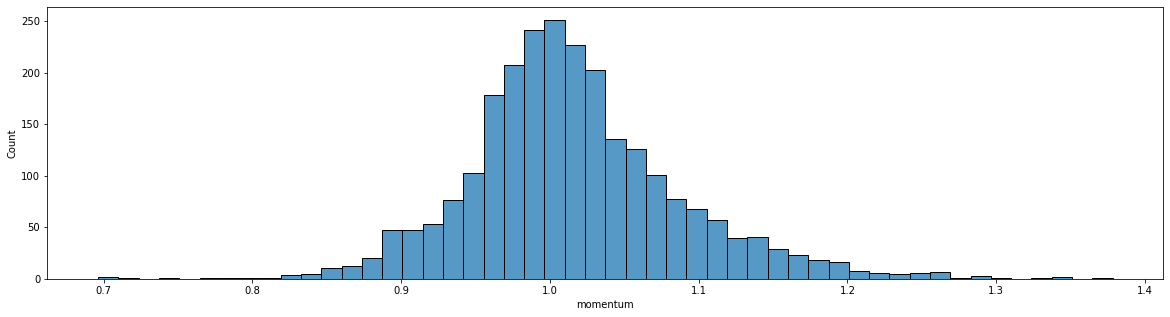

In [203]:
plt.figure(figsize=(20,5))
sns.histplot(final_df["momentum"],bins=50)

In [204]:
final_df["momentum"].describe()

count    2464.000000
mean        1.016056
std         0.072815
min         0.696188
25%         0.972407
50%         1.007830
75%         1.052456
max         1.378248
Name: momentum, dtype: float64

In [205]:
final_df.tail(20)

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou,Close_after_7_days,momentum
2727,2850.000000,2910.050049,2835.000000,2875.699951,779826.0,10,2021,13,2863.275024,2868.660010,...,2359.600098,1,0,1,1,1,1,1,2349.949951,0.817175
2728,2888.800049,2957.449951,2877.000000,2897.800049,914516.0,10,2021,14,2886.750000,2874.540039,...,2365.850098,1,0,1,1,1,1,1,2467.000000,0.851335
2729,2921.000000,2934.949951,2850.000000,2866.850098,896626.0,10,2021,18,2882.325074,2871.590039,...,2360.449951,1,0,1,1,1,1,1,2426.199951,0.846295
2730,2872.500000,3020.000000,2839.399902,2925.899902,2290860.0,10,2021,19,2896.375000,2883.420020,...,2360.699951,1,0,1,1,1,1,1,2247.050049,0.767986
2731,2871.000000,2885.949951,2500.000000,2555.100098,5468580.0,10,2021,20,2740.500000,2824.270020,...,2427.600098,1,0,1,1,1,1,1,2230.350098,0.872901
2732,2548.000000,2616.500000,2418.050049,2432.399902,4179873.0,10,2021,21,2493.750000,2735.610010,...,2451.149902,1,0,1,1,1,1,0,2302.899902,0.946760
2733,2450.000000,2522.350098,2380.199951,2437.350098,2362539.0,10,2021,22,2434.875000,2643.520020,...,2451.550049,1,0,1,1,1,1,0,2286.949951,0.938294
2734,2435.000000,2449.250000,2260.000000,2349.949951,1670054.0,10,2021,25,2393.650024,2540.139990,...,2448.600098,0,0,0,1,1,1,0,2271.300049,0.966531
2735,2350.000000,2480.000000,2330.000000,2467.000000,1487281.0,10,2021,26,2408.474976,2448.360010,...,2416.250000,0,0,0,1,1,1,1,2298.850098,0.931840
2736,2498.000000,2498.000000,2400.000000,2426.199951,1012747.0,10,2021,27,2446.599976,2422.579980,...,2375.500000,0,0,0,1,1,1,1,2363.350098,0.974095


In [206]:
final_df["Call"] = final_df["Close_after_7_days"]



In [207]:
final_df.drop(["Close_after_7_days"],axis=1,inplace=True)

In [208]:
final_df["Call"].unique().sum()

nan

In [209]:
final_df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou,momentum,Call
199,19.450001,19.450001,18.799999,19.125000,3040.0,7,2011,15,19.162501,18.831000,...,17.799999,1,0,1,0,1,1,1,1.145360,21.905001
200,19.440001,19.575001,19.299999,19.535000,7860.0,7,2011,18,19.330000,19.038000,...,18.000000,1,0,1,0,1,1,1,1.091374,21.320000
201,18.700001,20.600000,18.700001,20.309999,25850.0,7,2011,19,19.922500,19.395000,...,18.000000,1,0,1,0,1,1,1,1.016987,20.655001
202,19.510000,21.490000,19.510000,21.084999,598340.0,7,2011,20,20.697499,19.851000,...,17.940001,1,0,1,0,1,1,1,1.001897,21.125000
203,21.000000,21.799999,20.504999,21.709999,27830.0,7,2011,21,21.397499,20.352999,...,17.600000,1,0,1,0,1,1,1,0.973284,21.129999


In [210]:
training_df = final_df.dropna(axis=0)

In [211]:
training_df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou,momentum,Call
199,19.450001,19.450001,18.799999,19.125000,3040.0,7,2011,15,19.162501,18.831000,...,17.799999,1,0,1,0,1,1,1,1.145360,21.905001
200,19.440001,19.575001,19.299999,19.535000,7860.0,7,2011,18,19.330000,19.038000,...,18.000000,1,0,1,0,1,1,1,1.091374,21.320000
201,18.700001,20.600000,18.700001,20.309999,25850.0,7,2011,19,19.922500,19.395000,...,18.000000,1,0,1,0,1,1,1,1.016987,20.655001
202,19.510000,21.490000,19.510000,21.084999,598340.0,7,2011,20,20.697499,19.851000,...,17.940001,1,0,1,0,1,1,1,1.001897,21.125000
203,21.000000,21.799999,20.504999,21.709999,27830.0,7,2011,21,21.397499,20.352999,...,17.600000,1,0,1,0,1,1,1,0.973284,21.129999


In [212]:
training_df.drop(["momentum"],axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [213]:
training_df.head()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,senkou_B,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou,Call
199,19.450001,19.450001,18.799999,19.125000,3040.0,7,2011,15,19.162501,18.831000,...,18.040,17.799999,1,0,1,0,1,1,1,21.905001
200,19.440001,19.575001,19.299999,19.535000,7860.0,7,2011,18,19.330000,19.038000,...,18.040,18.000000,1,0,1,0,1,1,1,21.320000
201,18.700001,20.600000,18.700001,20.309999,25850.0,7,2011,19,19.922500,19.395000,...,18.350,18.000000,1,0,1,0,1,1,1,20.655001
202,19.510000,21.490000,19.510000,21.084999,598340.0,7,2011,20,20.697499,19.851000,...,18.795,17.940001,1,0,1,0,1,1,1,21.125000
203,21.000000,21.799999,20.504999,21.709999,27830.0,7,2011,21,21.397499,20.352999,...,18.950,17.600000,1,0,1,0,1,1,1,21.129999


In [214]:
training_df.head(50)

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,senkou_B,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou,Call
199,19.450001,19.450001,18.799999,19.125000,3040.0,7,2011,15,19.162501,18.831000,...,18.040000,17.799999,1,0,1,0,1,1,1,21.905001
200,19.440001,19.575001,19.299999,19.535000,7860.0,7,2011,18,19.330000,19.038000,...,18.040000,18.000000,1,0,1,0,1,1,1,21.320000
201,18.700001,20.600000,18.700001,20.309999,25850.0,7,2011,19,19.922500,19.395000,...,18.350000,18.000000,1,0,1,0,1,1,1,20.655001
202,19.510000,21.490000,19.510000,21.084999,598340.0,7,2011,20,20.697499,19.851000,...,18.795000,17.940001,1,0,1,0,1,1,1,21.125000
203,21.000000,21.799999,20.504999,21.709999,27830.0,7,2011,21,21.397499,20.352999,...,18.950000,17.600000,1,0,1,0,1,1,1,21.129999
204,21.900000,23.000000,21.254999,21.415001,26050.0,7,2011,22,21.562500,20.811000,...,19.550000,17.600000,1,0,1,0,1,1,1,20.790001
205,21.870001,22.965000,21.870001,22.655001,49100.0,7,2011,25,22.035001,21.435000,...,19.550000,17.075001,1,0,1,0,1,1,1,20.014999
206,21.000000,22.500000,21.000000,21.905001,10890.0,7,2011,26,22.280001,21.754000,...,19.550000,17.420000,1,0,1,1,1,1,1,19.639999
207,20.700001,22.480000,20.700001,21.320000,2390.0,7,2011,27,21.612500,21.801000,...,19.550000,17.495001,1,0,1,1,1,1,1,19.000000
208,21.350000,21.799999,19.250000,20.655001,1660.0,7,2011,28,20.987500,21.590001,...,19.550000,17.625000,1,0,1,1,1,1,1,18.299999


In [220]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 199 to 2747
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2471 non-null   float64
 1   High                   2471 non-null   float64
 2   Low                    2471 non-null   float64
 3   Close                  2471 non-null   float64
 4   Volume                 2471 non-null   float64
 5   Month                  2471 non-null   int64  
 6   Year                   2471 non-null   int64  
 7   Day                    2471 non-null   int64  
 8   Ma_2                   2471 non-null   float64
 9   Ma_5                   2471 non-null   float64
 10  Ma_12                  2471 non-null   float64
 11  Ma_25                  2471 non-null   float64
 12  Ma_50                  2471 non-null   float64
 13  Ma_100                 2471 non-null   float64
 14  Ma_200                 2471 non-null   float64
 15  Em

In [216]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2464 entries, 199 to 2739
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2464 non-null   float64
 1   High                   2464 non-null   float64
 2   Low                    2464 non-null   float64
 3   Close                  2464 non-null   float64
 4   Volume                 2464 non-null   float64
 5   Month                  2464 non-null   int64  
 6   Year                   2464 non-null   int64  
 7   Day                    2464 non-null   int64  
 8   Ma_2                   2464 non-null   float64
 9   Ma_5                   2464 non-null   float64
 10  Ma_12                  2464 non-null   float64
 11  Ma_25                  2464 non-null   float64
 12  Ma_50                  2464 non-null   float64
 13  Ma_100                 2464 non-null   float64
 14  Ma_200                 2464 non-null   float64
 15  Em

In [217]:
training_df.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Month                    0
Year                     0
Day                      0
Ma_2                     0
Ma_5                     0
Ma_12                    0
Ma_25                    0
Ma_50                    0
Ma_100                   0
Ma_200                   0
Ema_2                    0
Ema_5                    0
Ema_12                   0
Ema_25                   0
Ema_50                   0
Ema_100                  0
Ema_200                  0
MFI                      0
MFI_above_80             0
MFI_below_20             0
MFI_above_50             0
MFI_below_50             0
RSI                      0
RSI_above_60             0
RSI_below_40             0
MACD                     0
MACD_signal              0
MACD_above_MACDsignal    0
Close_change_1_day       0
Close_change_2_day       0
Close_change_3_day       0
Close_change_5_day       0
C

In [239]:
correlation= training_df.corr()



<AxesSubplot:>

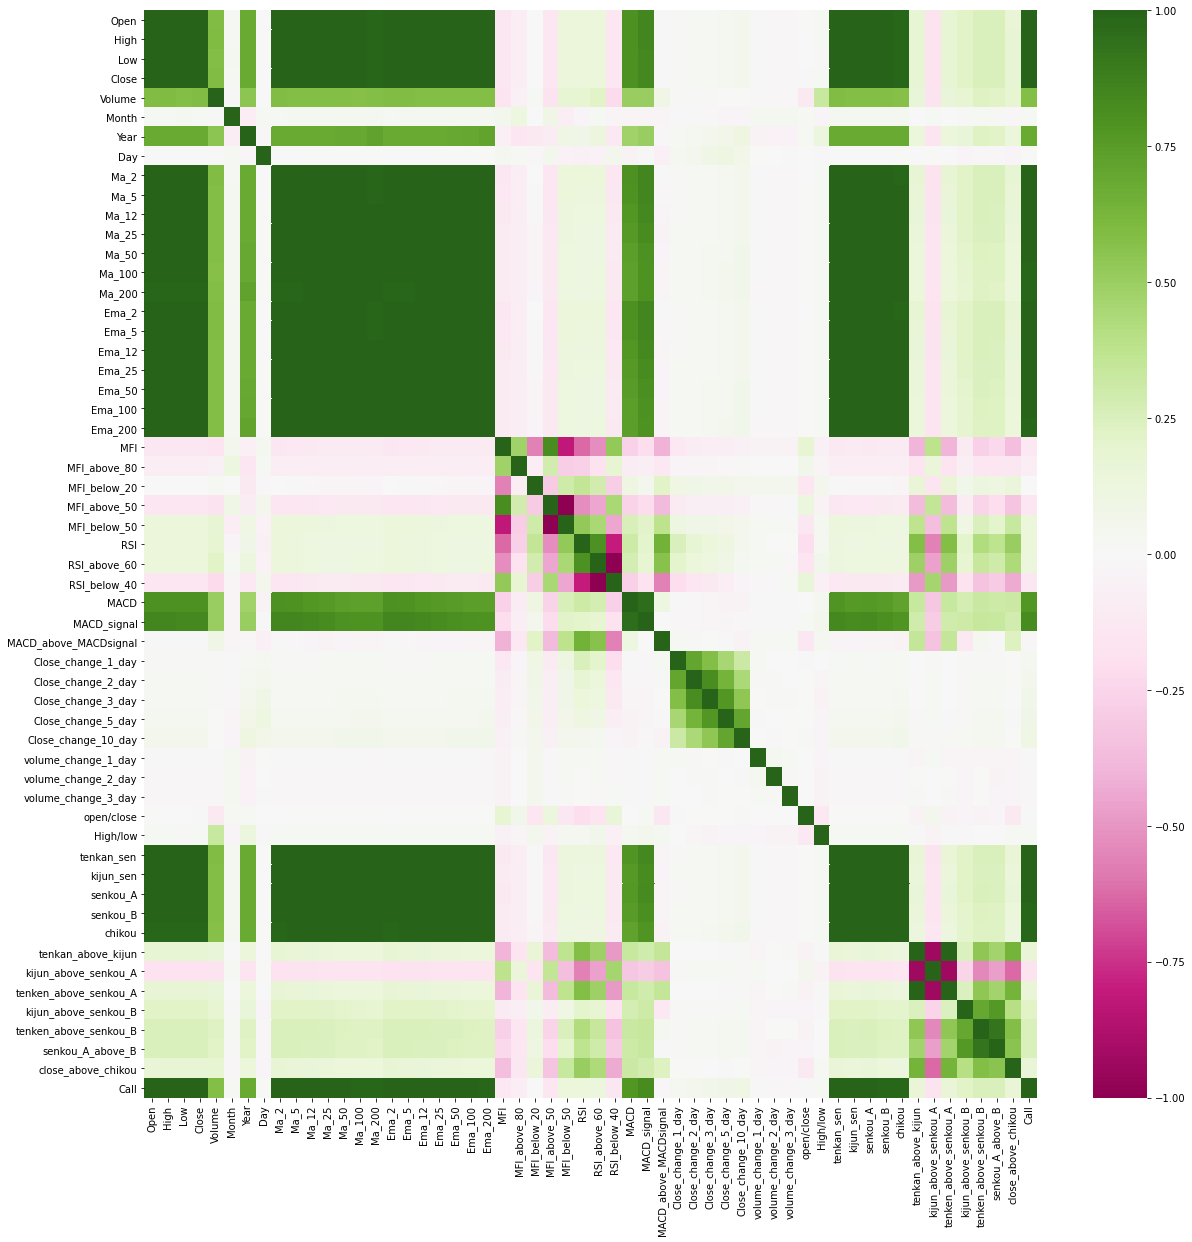

In [243]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,cmap="PiYG")

<AxesSubplot:xlabel='Call', ylabel='Count'>

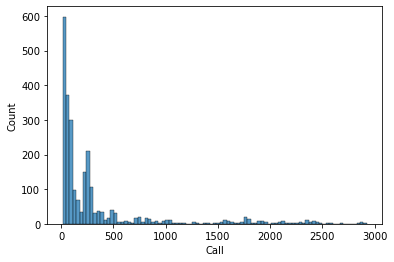

In [218]:
sns.histplot(training_df["Call"])

In [228]:
training_df.tail()

,Open,High,Low,Close,Volume,Month,Year,Day,Ma_2,Ma_5,...,senkou_B,chikou,tenkan_above_kijun,kijun_above_senkou_A,tenken_above_senkou_A,kijun_above_senkou_B,tenken_above_senkou_B,senkou_A_above_B,close_above_chikou,Call
2735,2350.000000,2480.000000,2330.000000,2467.000000,1487281.0,10,2021,26,2408.474976,2448.36001,...,2529.775024,2416.250000,0,0,0,1,1,1,1,2298.850098
2736,2498.000000,2498.000000,2400.000000,2426.199951,1012747.0,10,2021,27,2446.599976,2422.57998,...,2529.775024,2375.500000,0,0,0,1,1,1,1,2363.350098
2737,2350.000000,2350.000000,2183.649902,2247.050049,2556972.0,10,2021,28,2336.625000,2385.51001,...,2529.775024,2434.149902,0,0,0,1,1,1,0,2361.300049
2738,2257.800049,2309.600098,2192.000000,2230.350098,1676267.0,10,2021,29,2238.700074,2344.11001,...,2529.775024,2416.850098,0,0,0,1,1,1,0,2344.649902
2739,2250.000000,2314.800049,2250.000000,2302.899902,982359.0,11,2021,1,2266.625000,2334.70000,...,2529.775024,2469.199951,0,1,0,1,1,1,0,2354.250000


In [229]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=-1, random_state=2022, verbose=2, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [230]:
from sklearn.model_selection import train_test_split
x = training_df.drop(["Call"],axis=1)
y = training_df["Call"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=2022)

In [231]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1724, 55)
(1724,)
(740, 55)
(740,)


<AxesSubplot:xlabel='Call', ylabel='Count'>

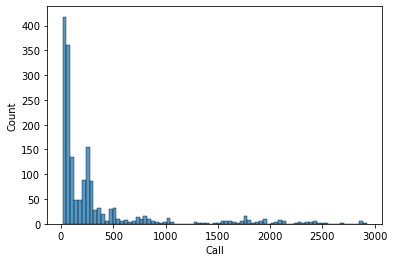

In [232]:
sns.histplot(ytrain)

<AxesSubplot:xlabel='Call', ylabel='Count'>

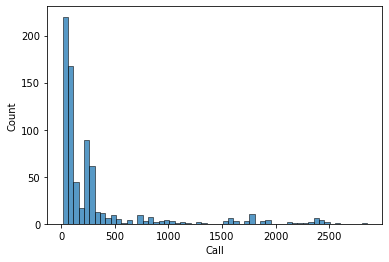

In [233]:
sns.histplot(ytest)

In [234]:
forest.fit(xtrain,ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.4s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100building tree 46 of 100

building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestRegressor(max_depth=15, n_jobs=-1, oob_score=True,
                      random_state=2022, verbose=2)

In [235]:
forest.oob_score_

0.9969131631903513

In [236]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [237]:
prediction=forest.predict(xtest)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [238]:
print("MAE")
print(mean_absolute_error(ytest,prediction))
print(" ")
print("MSE")
print(mean_squared_error(ytest,prediction))
print(" ")
print("RMSE")
print(np.sqrt(mean_squared_error(ytest,prediction)))
print(" ")
print("r2 score")
print(r2_score(ytest,prediction))

MAE
7.297426644024615
 
MSE
381.19159250904585
 
RMSE
19.524128469897082
 
r2 score
0.9985878565075612
